### TD - Classification multi-classes sur Wine Dataset (sklearn)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# 1. Chargement du dataset
# -------------------------------
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape X :", X.shape)
print("Classes :", data.target_names)

display(X.head())


Shape X : (178, 13)
Classes : ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
# 2. Train / Test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)




In [4]:
# 3. Standardisation

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 4. Modèles à tester

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=6),
    "Random Forest": RandomForestClassifier(n_estimators=300),
    "KNN": KNeighborsClassifier(n_neighbors=7)
}

results = {}

 Modèle : Logistic Regression
Accuracy : 0.9814814814814815

Matrice de confusion :
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]

Classification Report :
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



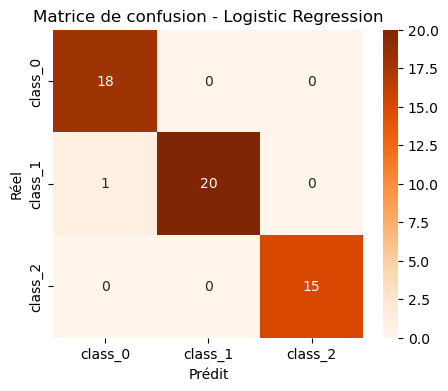

 Modèle : Decision Tree
Accuracy : 0.9444444444444444

Matrice de confusion :
 [[17  1  0]
 [ 2 19  0]
 [ 0  0 15]]

Classification Report :
               precision    recall  f1-score   support

     class_0       0.89      0.94      0.92        18
     class_1       0.95      0.90      0.93        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



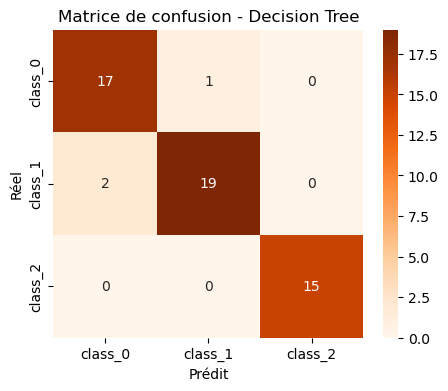

 Modèle : Random Forest
Accuracy : 1.0

Matrice de confusion :
 [[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]

Classification Report :
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



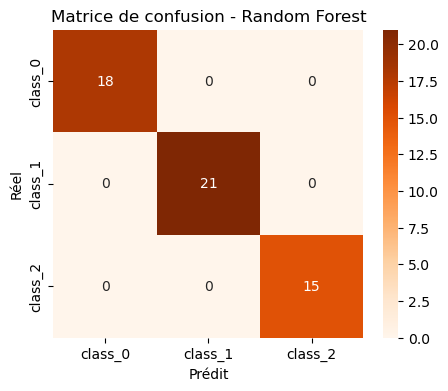

 Modèle : KNN
Accuracy : 0.9444444444444444

Matrice de confusion :
 [[18  0  0]
 [ 1 18  2]
 [ 0  0 15]]

Classification Report :
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.86      0.92        21
     class_2       0.88      1.00      0.94        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



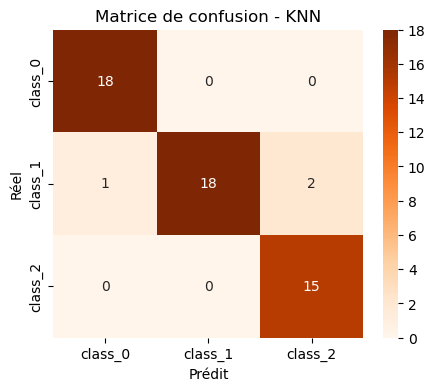

In [7]:
# 5. Entraînement & Evaluation

for name, model in models.items():
    print("=" * 70)
    print(f" Modèle : {name}")
    print("=" * 70)

    # Train
    model.fit(X_train_scaled, y_train)

    # Predict
    preds = model.predict(X_test_scaled)

    # Metrics
    acc = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    report = classification_report(y_test, preds, target_names=data.target_names)

    results[name] = (acc, cm, report)

    print("Accuracy :", acc)
    print("\nMatrice de confusion :\n", cm)
    print("\nClassification Report :\n", report)

    # -------------------------
    # Heatmap matrice confusion
    # -------------------------
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d",
                cmap="Oranges",
                xticklabels=data.target_names,
                yticklabels=data.target_names)
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()


### QUESTIONS & UPGRADE

1️⃣ Quel modèle obtient la meilleure accuracy parmi les quatre ?  
    → Pourquoi ce résultat est-il cohérent avec la nature du dataset Wine ?

2️⃣ Comparez les scores F1 pour les 3 classes.
    → Quel modèle traite le mieux les petites classes ?
    → Quel modèle est le plus équilibré ?

3️⃣ Comparez Decision Tree et Random Forest :
    → Pourquoi Random Forest surperforme presque toujours les arbres simples ?

4️⃣ Pour Logistic Regression :
    → Que se passe-t-il si vous supprimez la standardisation ?
      (Testez-le dans une cellule !)

5️⃣ Pour KNN :
    → Testez plusieurs valeurs de k : 1, 3, 5, 15, 25
    → Comment évolue la performance ?
    → Expliquez en termes de “biais / variance”.

6️⃣ Quelle métrique utiliser pour un dataset multi-classes ?
    • accuracy
    • F1-macro
    • F1-weighted
    Justifiez votre choix.

7️⃣ BONUS : Ajoutez une étape de PCA (2D) et visualisez les clusters.
    → Les classes sont-elles bien séparées dans l’espace réduit ?
""")
